(25976, 24) (50976, 27)
['19556' 'Female' 'Loyal Customer' '52' 'Business travel' 'Eco' '160' '5'
 '4' '3' '4' '3' '4' '3' '5' '5' '5' '5' '2' '5' '5' '50' '44' 'satisfied']
['45001' 'Male' 'Disloyal Customer' '32' 'Business travel' 'Eco' '1292'
 '5' '3' '0' '2' '4' '2' '2' '4' '3' '5' '3' '3' '4' '0' '2' '82'
 'satisfied' 'Positive experience' 'False' 'Medium Distance']


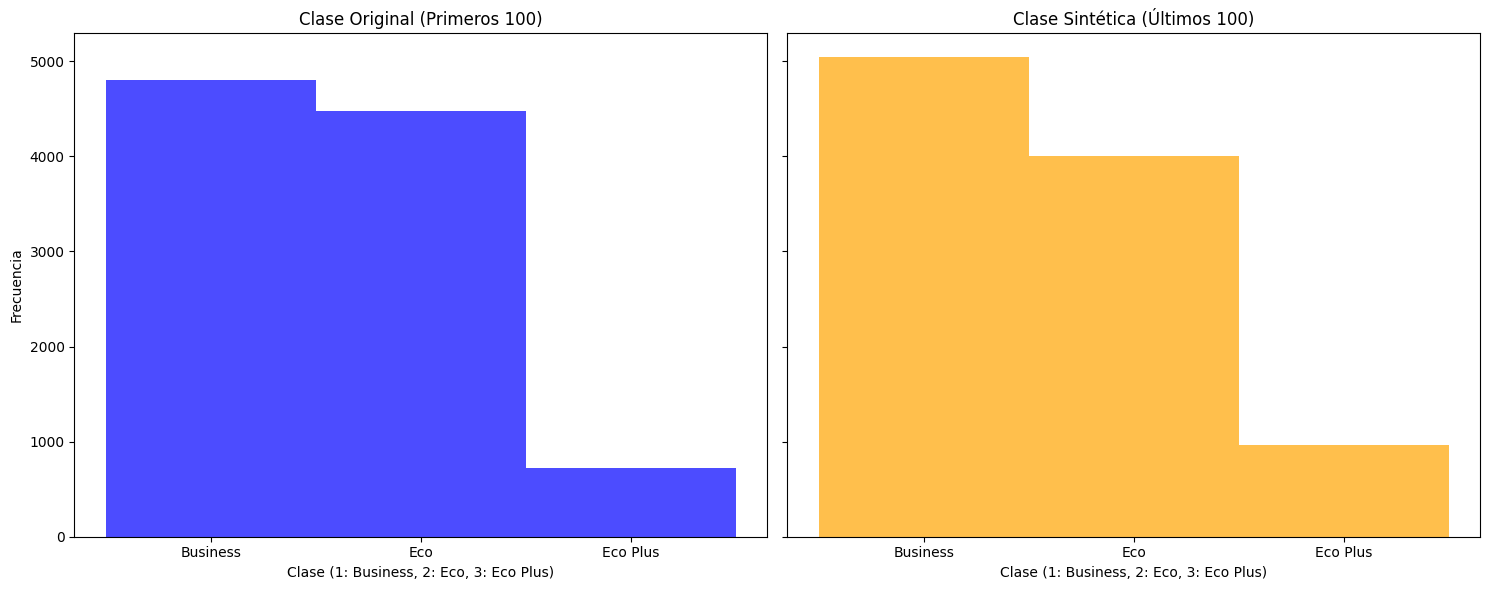

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Función para transformar la columna 'Class'
def transformar_clase(data):
    class_map = {'Business': 1, 'Eco': 2, 'Eco Plus': 3}
    # Reemplazar los valores inválidos con 'Eco' (valor predeterminado)
    data[:, 6] = np.where(np.isin(data[:, 6], list(class_map.keys())), data[:, 6], 'Eco')
    data[:, 6] = np.vectorize(class_map.get)(data[:, 5])
    return data

# Cargar el dataset original y sintético
data_original = np.genfromtxt('test.csv', delimiter=',', dtype=str, encoding=None, skip_header=1)
data_sintetico = np.genfromtxt('dataset_sintetico_ampliado.csv', delimiter=',', dtype=str, encoding=None, skip_header=1)

# Eliminar la columna de índice '#'
data_original = np.delete(data_original, 0, axis=1)
data_sintetico = np.delete(data_sintetico, 0, axis=1)
print(data_original.shape, data_sintetico.shape)
print(data_original[0])
print(data_sintetico[45000])

# Transformar la columna 'Class' en ambos datasets
data_original = transformar_clase(data_original)
data_sintetico = transformar_clase(data_sintetico)

# Seleccionar los primeros 100 datos del dataset original
muestra_original = data_original[:10000, 6].astype(int)

# Seleccionar los últimos 100 datos del dataset sintético
muestra_sintetico = data_sintetico[-10000:, 6].astype(int)

# Función para crear gráficas de comparación
def plot_side_by_side(data1, data2, title1, title2, xlabel, ylabel):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

    axs[0].hist(data1, bins=np.arange(1, 5) - 0.5, alpha=0.7, color='blue')
    axs[0].set_title(title1)
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)
    axs[0].set_xticks([1, 2, 3])
    axs[0].set_xticklabels(['Business', 'Eco', 'Eco Plus'])

    axs[1].hist(data2, bins=np.arange(1, 5) - 0.5, alpha=0.7, color='orange')
    axs[1].set_title(title2)
    axs[1].set_xlabel(xlabel)
    axs[1].set_xticks([1, 2, 3])
    axs[1].set_xticklabels(['Business', 'Eco', 'Eco Plus'])

    plt.tight_layout()
    plt.show()

# Graficar comparación de la columna 'Class' entre el dataset original y sintético
plot_side_by_side(muestra_original, muestra_sintetico,
                  'Clase Original (Primeros 100)', 'Clase Sintética (Últimos 100)',
                  'Clase (1: Business, 2: Eco, 3: Eco Plus)', 'Frecuencia')
